# **Illustration of the use of the stationary phase approximation.**

<p style="text-align: justify;font-size:15px;width: 90%">
In this notebook, we investigate the use of the stationary phase approximation applied to the evaluation of the integral $\int \limits_{-2}^{2} dx e^{i\alpha(x^2-a)}, a \in (-2,2)$. To demonstrate its usefulness, we consider both the brute-force numerical evaluation of this integral and see that when $\alpha$ is increased, the number of discrete grid points required for accurate evaluation in this way becomes unfavourably large. On the other hand, we observe that with increasing $\alpha$ the stationary phase approximation becomes an increasingly better estimation of the integral. This, we see, is due to the more pronounced cancellations of the contributions to the integral from the highly oscillatory parts of the integrand lying outwith the immediate vicinity of the point where the integrand's phase is stationary.
</p>

<IPython.core.display.Javascript object>


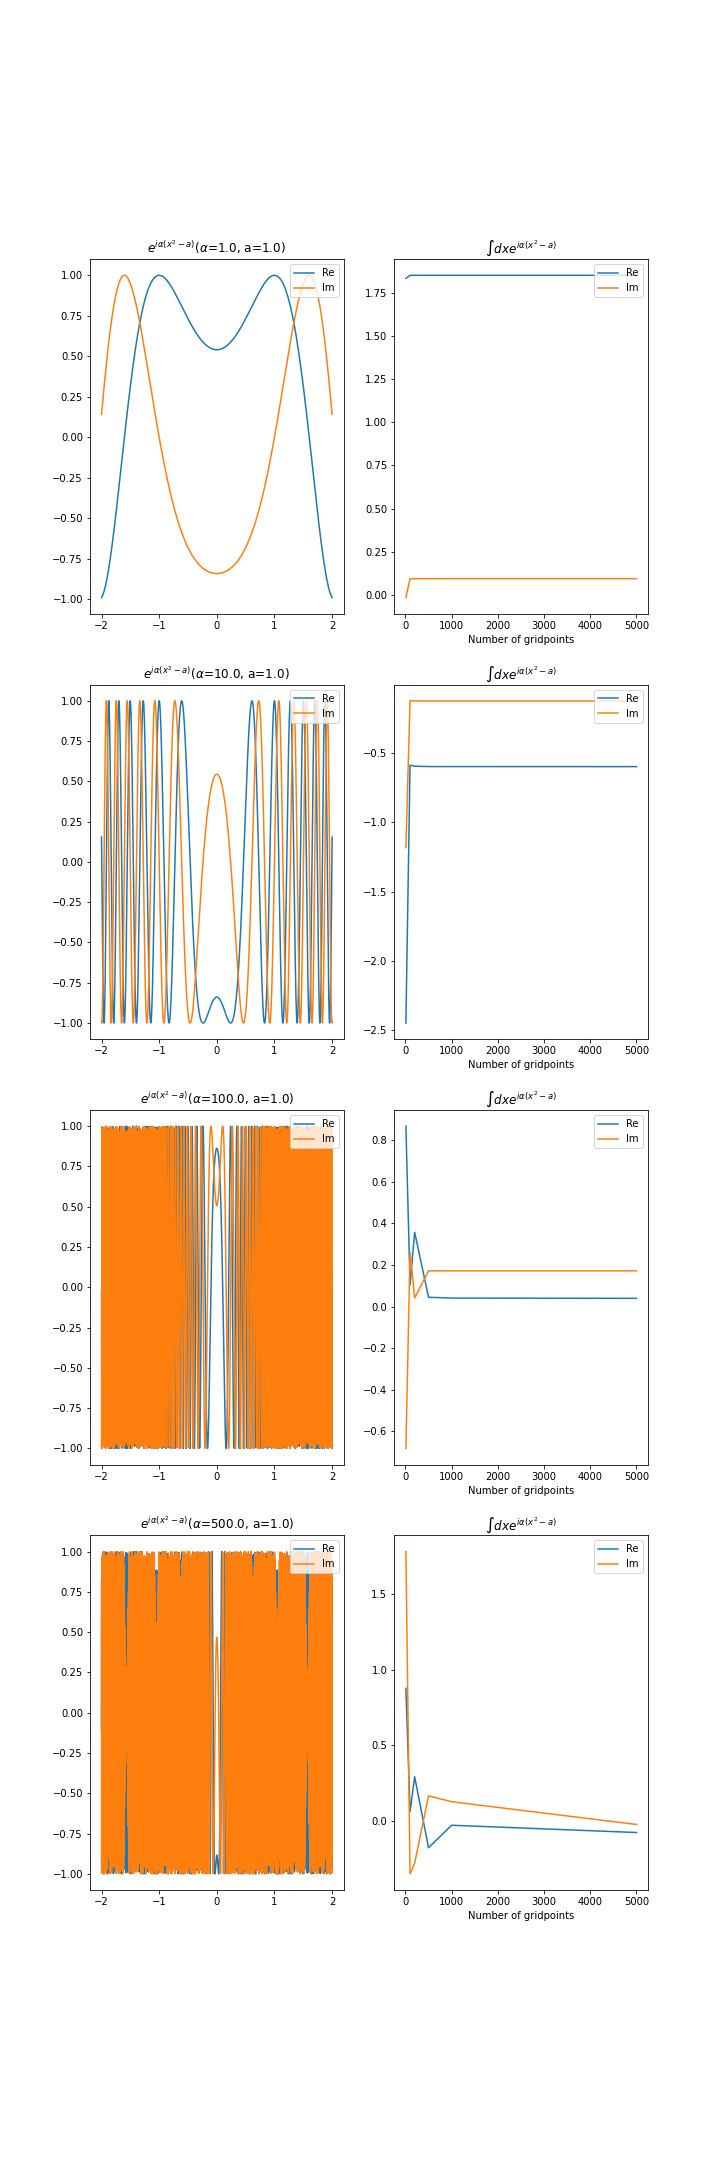

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

x=np.linspace(-2,2,2000)

def f_x(x,alpha,a):
    return np.exp(1.j*alpha*(x**2-a))

def int_f(x,alpha,a,Ngrid):
    
    dx=(x[-1]-x[0])/Ngrid
    I=0.+0.j
    for n in range(Ngrid):
        I += f_x(x[0]+n*dx,alpha,a)*dx
        
    return I

    

alpha=10.0
a=1.0


alpha_range=[1.0,10.0,100.0,500.0]
Ngrid_range=[10,100,200,500,1000,5000]

If_lst=[]
sp_lst=[]

num_plots =len(alpha_range)
fig,axs=plt.subplots(num_plots,2,figsize=(10,30))




plt.title(r"$e^{i\alpha(x^2-a)}$")
for i,alpha in enumerate(alpha_range):
    If_lst=[]
    # look at convergence of numerical integration
    for num_points in Ngrid_range:
        If= int_f(x,alpha,a,num_points)
        If_lst.append(If)
    
    axs[i][0].plot(x,np.real(f_x(x,alpha,a)),label="Re")
    axs[i][0].plot(x,np.imag(f_x(x,alpha,a)),label="Im")
    axs[i][0].set_title(r"$e^{i\alpha(x^2-a)}$"+r"($\alpha$="+str(alpha)+", a="+str(a)+")")
    axs[i][0].legend(loc="upper right")

    
    axs[i][1].plot(Ngrid_range,np.real(If_lst),label="Re")
    axs[i][1].plot(Ngrid_range,np.imag(If_lst),label="Im")
    axs[i][1].set_xlabel("Number of gridpoints")
    axs[i][1].set_title(r"$ \int dx e^{i\alpha(x^2-a)}$")
    axs[i][1].legend(loc="upper right")



In [15]:
%matplotlib inline
from ipywidgets import interactive,Dropdown,Layout,VBox
import matplotlib.pyplot as plt
import numpy as np

"""
This function has 3 stationary points but we consider only the one at at x=0 to illustrate the approximation.
"""

def f2_x_interactive(alpha=1.0,a=1.0,Real_or_Imaginary_part='real'):
    plt.figure(2)
    x = np.linspace(-2, 2, num=2000)

    f = np.exp(1.j*alpha*(x**2-a)**2)
    f_sp= np.exp(1.j*alpha*(a**2-2*a*x**2))
    if(Real_or_Imaginary_part=='real'):
        plt.plot(x, np.real(f),label="Re(f(x))" )
        plt.plot(x, np.real(f_sp),label="Re(SP approx)" )

    else:
        plt.plot(x, np.imag(f),label="Im(f(x))")
        plt.plot(x, np.imag(f_sp),label="Im(SP approx))" )


    plt.xlim(-2, 2)
    plt.legend()
    plt.show()
    
def f2_x(x,alpha,a):
    return np.exp(1.j*alpha*(x**2-a)**2)
    
def int_f2(x,alpha,a,Ngrid):
    
    If_lst=[]
    dx=(x[-1]-x[0])/Ngrid
    I=0.+0.j
    for n in range(Ngrid):
        I += f2_x(x[0]+n*dx,alpha,a)*dx
        If_lst.append(np.real(I))
        
    return If_lst
    
def f2_int_x_interactive(integral_lims=2.0,alpha=10.0,a=10.0, Ngrid=1000,Real_or_Imaginary_part='real'):

    
    x = np.linspace(-1.*integral_lims, integral_lims, num=Ngrid)    

    If_lst=np.array(int_f2(x,alpha,a,Ngrid))       

    If_sp= np.exp(1.j*alpha*a**2)*np.sqrt(np.pi/(2.j*alpha*a))*np.ones(len(x))
    
    if(Real_or_Imaginary_part=='real'):
        plt.plot(x, np.real(If_lst),label="Re($\int$ f(x))")
        plt.plot(x, np.real(If_sp),label="Re(SP approx)",linestyle="dotted" )

    else:
        plt.plot(x, np.imag(If_lst),label="Im($\int$f(x))")
        plt.plot(x, np.imag(If_sp),label="Im(SP approx))" )


    plt.xlim(-1.*integral_lims, integral_lims)
    plt.legend()
    plt.show()
    
    
def on_parameters_change(change):
    x, y = get_numerical_array(type_widget.value)
    line.set_data(x, y)
    fig.canvas.draw_idle()
     
type_widget = Dropdown(options=(
        ("Real part","Re"),
        ("Imaginary part","Im"),  
    ), 
    description = "Real/Imaginary part of function.", continuous_update=False, layout=Layout(width='250px'))

interactive_plot = interactive(f2_x_interactive, alpha=(0.0, 100.0,1), a=(-1.95, 1.95), Real_or_Imaginary_part=['real', 'imaginary'])
output = interactive_plot.children[-1]
output.layout.height = '450px'

interactive_plot2 = interactive(f2_int_x_interactive,integral_lims=(1.0,10.0), alpha=(0.0, 100.0,1), a=(-1.0,1.0), Real_or_Imaginary_part=['real', 'imaginary'])
box1 = VBox([interactive_plot, interactive_plot2], layout=Layout(width='400px'))

box1

In [20]:
%matplotlib inline
from ipywidgets import interactive,Dropdown,Layout,VBox,HBox
import matplotlib.pyplot as plt
import numpy as np


def f_x(x,alpha,a):
    return np.exp(1.j*alpha*(x**2-a))

def f_x_interactive(alpha=1.0,a=1.0,Real_or_Imaginary_part='real'):
    plt.figure(2)
    x = np.linspace(-2, 2, num=2000)

    f = np.exp(1.j*alpha*(x**2-a))
    if(Real_or_Imaginary_part=='real'):
        plt.plot(x, np.real(f),label="Re" )
    else:
        plt.plot(x, np.imag(f),label="Im",color='red' )

    plt.ylim(-2, 2)
    plt.legend()
    plt.show()
    
def int_f(x,alpha,a,Ngrid):
    
    If_lst=[]
    dx=(x[-1]-x[0])/Ngrid
    I=0.+0.j
    for n in range(Ngrid):
        I += f_x(x[0]+n*dx,alpha,a)*dx
        If_lst.append(np.real(I))
        
    return If_lst
    
def f_int_x_interactive(integral_lims=2.0,alpha=10.0,a=0.0, Ngrid=1000,Real_or_Imaginary_part='real'):

    
    x = np.linspace(-1.*integral_lims, integral_lims, num=Ngrid)    

    If_lst=np.array(int_f(x,alpha,a,Ngrid))       

    
    if(Real_or_Imaginary_part=='real'):
        plt.plot(x, np.real(If_lst),label="Re($\int$ f(x))" )
#         plt.plot(x, np.real(f_sp),label="Re(SP approx)" )

    else:
        plt.plot(x, np.imag(If_lst),label="Im($\int$f(x))")
#         plt.plot(x, np.imag(f_sp),label="Im(SP approx))" )


    plt.xlim(-1.*integral_lims, integral_lims)
    plt.legend()
    plt.show()
    
    
# def on_parameters_change(change):
#     x, y = get_numerical_array(type_widget.value)
#     line.set_data(x, y)
#     fig.canvas.draw_idle()
     
# type_widget = Dropdown(options=(
#         ("Real part","Re"),
#         ("Imaginary part","Im"),  
#     ), 
#     description = "Real/Imaginary part of function.", continuous_update=False, layout=Layout(width='250px'))

interactive_plot = interactive(f_x_interactive, alpha=(0.0, 1000.0), a=(-1.95, 1.95), Real_or_Imaginary_part=['real', 'imaginary'])
interactive_plot2 = interactive(f_int_x_interactive,integral_lims=(1.0,10.0), alpha=(0.0,100,1.), a=(-1.,1.), Real_or_Imaginary_part=['real', 'imaginary'])

output = interactive_plot.children[-1]
output.layout.height = '450px'

# interactive_plot
box1 = VBox([interactive_plot, interactive_plot2], layout=Layout(width='400px'))

box1

In [22]:
"""
Trying out a function f(x) which should have 1 SP and have a 2nd order Taylor expansion which is different from 
f(x) itself: exp^(i*alpha*exp^(-x^2))
"""
%matplotlib inline
from ipywidgets import interactive,Dropdown,Layout,VBox,HBox
import matplotlib.pyplot as plt
import numpy as np

def f_x(x,alpha,a):
    return np.exp(1.j*alpha*np.exp(1.*x**2))

def f_x_interactive(alpha=1.0,a=1.0,Real_or_Imaginary_part='real'):
    plt.figure(2)
    x = np.linspace(-2, 2, num=2000)

    f = np.exp(1.j*alpha*np.exp(1.*x**2))
    f_sp = np.exp(1.j*alpha*(1.+x**2))
    if(Real_or_Imaginary_part=='real'):
        plt.plot(x, np.real(f),label="Re" )
        plt.plot(x, np.real(f_sp),label="Re" )

    else:
        plt.plot(x, np.imag(f),label="Im")
        plt.plot(x, np.imag(f_sp),label="Im")

    plt.ylim(-2, 2)
    plt.legend()
    plt.show()
    
def int_f(x,alpha,a,Ngrid):
    
    If_lst=[]
    dx=(x[-1]-x[0])/Ngrid
    I=0.+0.j
    for n in range(Ngrid):
        I += f_x(x[0]+n*dx,alpha,a)*dx
        If_lst.append(np.real(I))
        
    return If_lst
    
def f_int_x_interactive(integral_lims=2.0,alpha=10.0,a=0.0, Ngrid=1000,Real_or_Imaginary_part='real'):

    
    x = np.linspace(-1.*integral_lims, integral_lims, num=Ngrid)    

    If_lst=np.array(int_f(x,alpha,a,Ngrid))       

    If_sp = np.sqrt(np.pi/alpha)*np.exp(1.j*alpha)*np.exp(1.j*np.pi/4.)*np.ones(len(x))
    if(Real_or_Imaginary_part=='real'):
        plt.plot(x, np.real(If_lst),label="Re($\int$ f(x))" )
        plt.plot(x, np.real(If_sp),label="Re(SP approx)" )

    else:
        plt.plot(x, np.imag(If_lst),label="Im($\int$f(x))")
        plt.plot(x, np.imag(If_sp),label="Im(SP approx))" )


    plt.xlim(-1.*integral_lims, integral_lims)
    plt.legend()
    plt.show()
    
    
# def on_parameters_change(change):
#     x, y = get_numerical_array(type_widget.value)
#     line.set_data(x, y)
#     fig.canvas.draw_idle()
     
# type_widget = Dropdown(options=(
#         ("Real part","Re"),
#         ("Imaginary part","Im"),  
#     ), 
#     description = "Real/Imaginary part of function.", continuous_update=False, layout=Layout(width='250px'))

interactive_plot = interactive(f_x_interactive, alpha=(0.0, 1000.0), a=(-1.95, 1.95), Real_or_Imaginary_part=['real', 'imaginary'])
interactive_plot2 = interactive(f_int_x_interactive,integral_lims=(1.0,10.0), alpha=(0.0,100,1.), a=(-1.,1.), Real_or_Imaginary_part=['real', 'imaginary'])

output = interactive_plot.children[-1]
output.layout.height = '450px'

# interactive_plot
box1 = VBox([interactive_plot, interactive_plot2], layout=Layout(width='400px'))

box1




alpha=1.0
If=2.2391394755545657+1.4875029312376338i
SP_approx=-0.37745896303183013+-1.7317959997692363i

alpha=10.0
If=0.009839737619810291+0.49587586061147637i
SP_approx=-0.11693813765709338+0.5481648815094505i

alpha=100.0
If=0.15717800638281193+0.004159101233986329i
SP_approx=0.17153916501658012+-0.044612121685842596i

alpha=500.0
If=0.00261120058616435+0.07253143849712418i
SP_approx=-0.023321105540920446+0.07575824274314207i

alpha=1000.0
If=0.07860841872724869+0.047106562429367435i
SP_approx=-0.010483019101570054+-0.055060865994877986i

alpha=2000.0
If=0.039135909119102814+0.0537292900338056i
SP_approx=-0.03636235399123617+-0.01576627854031914i

alpha=5000.0
If=0.007276846702433549+0.003389654055069072i
SP_approx=0.02025267531106066+0.014769823068090986i

alpha=10000.0
If=0.001383711352986358+0.01825617853771144i
SP_approx=-0.00810318949799186+0.01576380618120553i



<IPython.core.display.Javascript object>


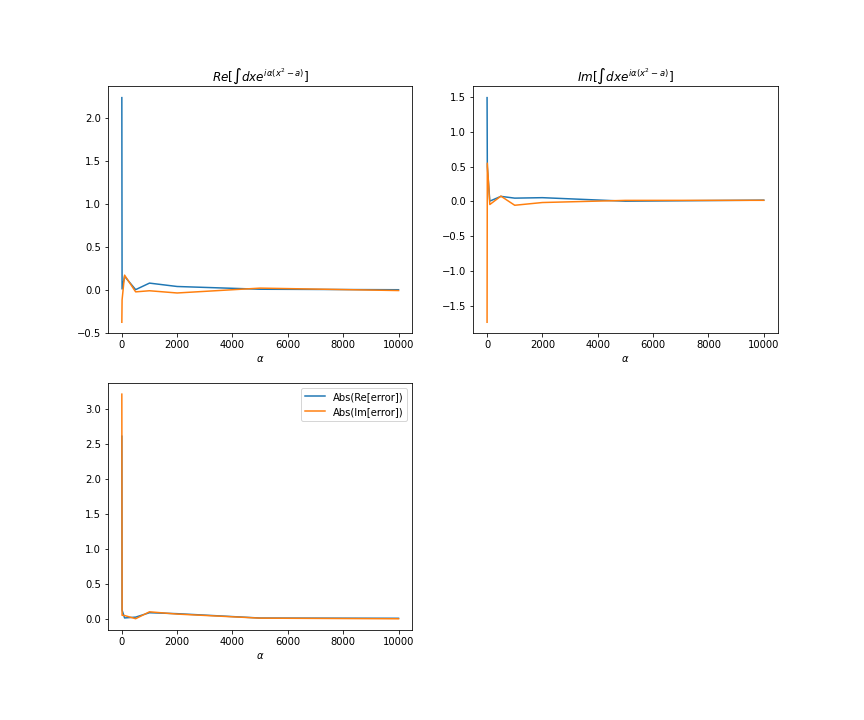

In [9]:
%matplotlib notebook
alpha_range=[1.0,10.0,100.0,500.0]
alpha_range=[1.0,10.0,100.0,500.0,1000.0,2000.0,5000.0,10000.0]

If_lst=[]
sp_lst=[]

x=np.linspace(-2,2,num=1000)
a=1.0

def f_x(x,alpha,a=100):
    return np.exp(1.j*alpha*(x**2-a)**2)

def int_f(x,alpha,a,Ngrid):
    
    If_lst=[]
    dx=(x[-1]-x[0])/Ngrid
    I=0.+0.j
    for n in range(Ngrid):
        I += f_x(x[0]+n*dx,alpha,a)*dx
        
    return I
for alpha in alpha_range:
    Ngrid=100*int(alpha)
    If= int_f(x,alpha,a,Ngrid)
    If_lst.append(If)
    print("alpha=" + str(alpha))
    print("If={}+{}i".format(np.real(If),np.imag(If)))

    sp_approx=np.sqrt(2.*np.pi/(2.j*alpha))*np.exp(-1.j*alpha*a)
    sp_lst.append(sp_approx)
    print("SP_approx={}+{}i".format(np.real(sp_approx),np.imag(sp_approx)))
    print()

fig2=plt.figure()
fig2.set_size_inches(12,10)

ax1=fig2.add_subplot(221)
ax1.set_title(r"$ Re[\int dx e^{i\alpha(x^2-a)}]$")
ax1.set_xlabel(r"$\alpha$")
plt.plot(alpha_range,np.real(If_lst), label="Numerical integration")
plt.plot(alpha_range,np.real(sp_lst), label="Stationary phase approx")
ax2=fig2.add_subplot(222)
ax2.set_xlabel(r'$\alpha$')
ax2.set_title(r"$ Im[\int dx e^{i\alpha(x^2-a)}]$")

plt.plot(alpha_range,np.imag(If_lst), label="Numerical integration")
plt.plot(alpha_range,np.imag(sp_lst), label="Stationary phase approx")


ax2=fig2.add_subplot(223)
ax2.set_xlabel(r'$\alpha$')
#ax2.set_xlim(0,1000)
# ax2.set_title("error")

plt.plot(alpha_range,np.abs(np.real(np.array(If_lst)-np.array(sp_lst))), label="Abs(Re[error])")

plt.plot(alpha_range,np.abs(np.imag(np.array(If_lst)-np.array(sp_lst))), label="Abs(Im[error])")


plt.legend()